In [1]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
 os.getcwd()

'C:\\Users\\djnbu\\OneDrive\\Desktop\\scData'

In [3]:
os.chdir("C:\\Users\\scdata_path")

In [4]:
input_dir = 'agg_counts/'
counts_matrix = scipy.io.mmread(input_dir +'matrix.mtx').T.tocsc()
genes = np.array(scr.load_genes(input_dir +'genes.tsv', delimiter='\t', column=1))

In [5]:
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.15)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 3.0%
Estimated detectable doublet fraction = 40.9%
Overall doublet rate:
	Expected   = 15.0%
	Estimated  = 7.3%
Elapsed time: 50.5 seconds


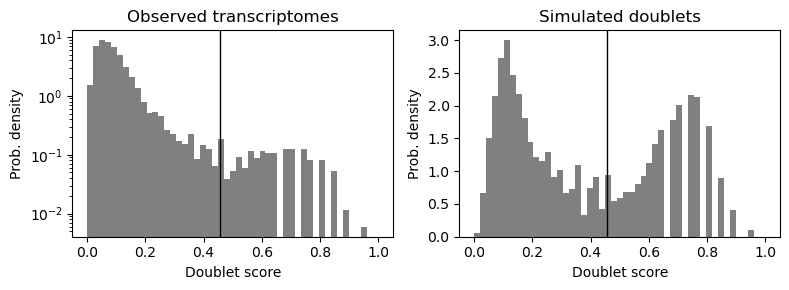

In [6]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_gene_variability_pctl=85,n_prin_comps=50,min_counts=2,min_cells=3)
scrub.plot_histogram();

Detected doublet rate = 5.3%
Estimated detectable doublet fraction = 52.5%
Overall doublet rate:
	Expected   = 15.0%
	Estimated  = 10.1%


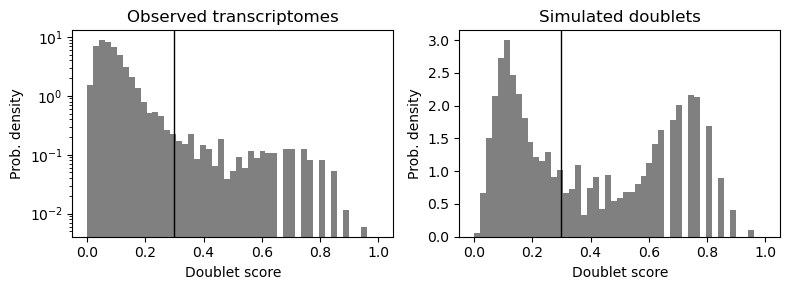

In [13]:
scrub.call_doublets(threshold=0.3)
scrub.plot_histogram();

In [10]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
#print('Running tSNE...')
#scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

Running UMAP...


C:\Users\djnbu\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Done.


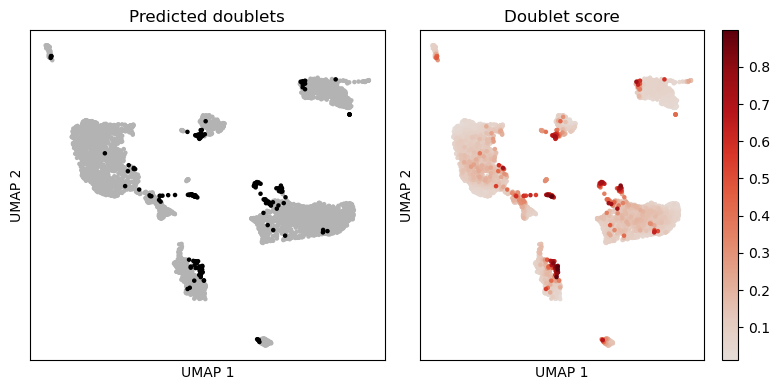

In [11]:
scrub.plot_embedding('UMAP', order_points=True);
    
# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [14]:
import pandas as pd
df = pd.DataFrame({
    'doublet_score': scrub.doublet_scores_obs_,
    'predicted_doublet': scrub.predicted_doublets_
})
df.to_csv('agg_scrublet_output_table.csv', index=False)